# Image Processing

## Textural / Timbral
* 2D FFT
* hue, saturation, value (HSV)
* pixel clustering

## Compositional
* blur
* entropy
* complimentary colors
* regularities / texture (wavelets)
* contrast boundaries (edge detection)

## Semantic
* CNN object classification

In [53]:
# import necessary packages
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import scipy
import numpy as np
import colorsys
import collections
from sklearn.cluster import KMeans

In [20]:
# open image
im = Image.open("test.jpg")

# get width and height, dim of square image
w, h = im.size
sq = np.min([w, h])
sq_in = [w, h].index(sq)

# crop image to square
if sq_in == 0:
    im_crop = im.crop((0,
                       (h / 2) - (int)(sq / 2),
                       w, 
                       (h / 2) + (int)(sq / 2)))
else:
    im_crop = im.crop(((w / 2) - (int)(sq / 2),
                       0,
                       (w / 2) + (int)(sq / 2), 
                       h))

# resize cropped image
new_sq = (300, 300)
im_rs = im_crop.resize(new_sq)

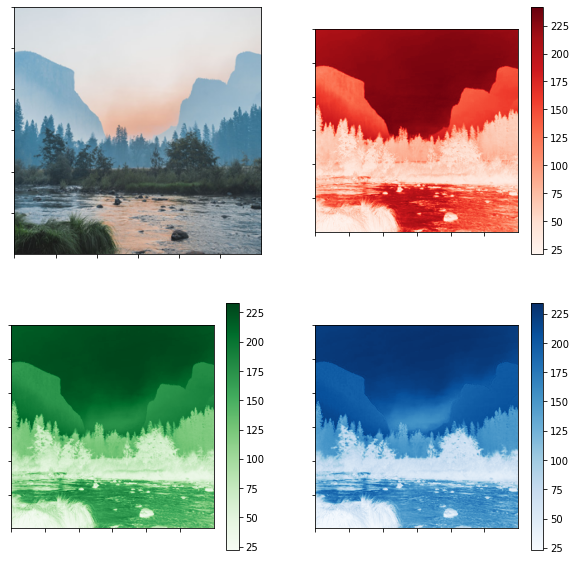

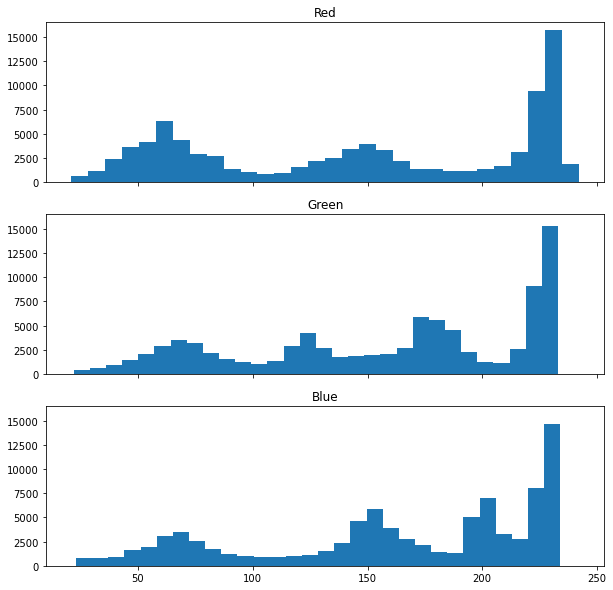

In [31]:
# get rgb color channels
im_ar = np.array(im_rs)
r, g, b = im_ar[:, :, 0], im_ar[:, :, 1], im_ar[:, :, 2]

# plot rgb
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10, 10)

plt_00 = axs[0,0].imshow(im_ar)
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

plt_01 = axs[0,1].imshow(r, cmap = 'Reds')
fig.colorbar(plt_01, ax = axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

plt_10 = axs[1,0].imshow(g, cmap = 'Greens')
fig.colorbar(plt_10, ax = axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

plt_11 = axs[1,1].imshow(b, cmap = 'Blues')
fig.colorbar(plt_11, ax = axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

# Plot histograms
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(10, 10)

axs[0].hist(r.ravel(), bins = 30)
axs[0].set_title('Red')
axs[1].hist(g.ravel(), bins = 30)
axs[1].set_title('Green')
axs[2].hist(b.ravel(), bins = 30)
axs[2].set_title('Blue')

plt.show()

In [41]:
# scale rgb to [0, 1]
r_sc, g_sc, b_sc = r / 255., g / 255., b / 255.

# convert rgb to hsv
h, s, v = np.zeros((300, 300)), np.zeros((300, 300)), np.zeros((300, 300))
for i in range(300):
    for j in range(300):
        temp_hsv = colorsys.rgb_to_hsv(r_sc[i, j], b_sc[i, j], g_sc[i, j])
        h[i][j] = temp_hsv[0]
        s[i][j] = temp_hsv[1]
        v[i][j] = temp_hsv[2]

(array([3.3340e+03, 2.4000e+01, 2.8000e+01, 2.4000e+01, 1.7000e+01,
        1.3000e+01, 8.4000e+01, 3.0000e+00, 2.1000e+01, 3.0000e+00,
        1.4000e+01, 0.0000e+00, 0.0000e+00, 4.9000e+01, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 1.5000e+01, 5.0000e+00, 1.0000e+00,
        2.4000e+01, 5.0000e+00, 2.2000e+01, 1.4000e+01, 2.2000e+01,
        1.0000e+00, 1.4200e+02, 1.0000e+00, 1.9000e+01, 6.9000e+01,
        8.6000e+01, 3.8110e+03, 1.1530e+03, 1.3820e+03, 1.2653e+04,
        2.4671e+04, 5.2460e+03, 2.3980e+03, 1.2140e+03, 6.9000e+02,
        1.2740e+03, 8.4600e+02, 6.0900e+02, 4.1700e+02, 6.0900e+02,
        5.2700e+02, 1.1220e+03, 4.1600e+02, 4.1100e+02, 5.3900e+02,
        1.0720e+03, 6.7700e+02, 5.7900e+02, 8.3700e+02, 2.4900e+02,
        3.2700e+02, 1.4100e+02, 1.0800e+02, 2.5800e+02, 3.5000e+01,
        6.8000e+01, 3.8000e+01, 4.3000e+01, 4.5000e+01, 4.2000e+01,
        2.1000e+01, 1.5000e+01, 6.9300e+02, 4.6000e+01, 9.9000e+01,
        1.3300e+02, 1.7150e+03, 2.3500e+02, 5.22

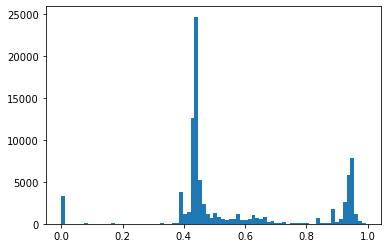

In [52]:
plt.hist(h.ravel(), bins = 80)

(array([64063.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        22297.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  3640.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0

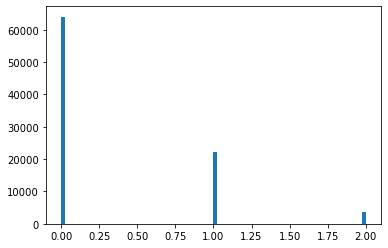

In [74]:
x = h
km = KMeans(n_clusters = 3)
km.fit(x.reshape(-1,1))

plt.hist(list(km.labels_), bins = 80)

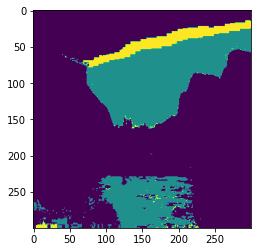

In [75]:
test_ar = np.array(km.labels_).reshape((300, 300))
plt.set_cmap('viridis')
plt.imshow(test_ar)

In [ ]:
# binarize / categorize

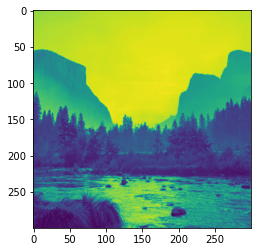

In [76]:
plt.imshow(r_sc)

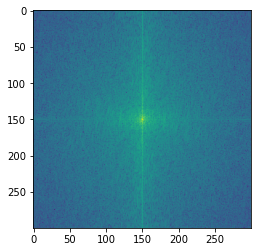

In [77]:
ft = np.fft.fft2(r_sc)
ft_shift = np.fft.fftshift(ft)
magnitude_spectrum = 20 * np.log(np.abs(ft_shift))
plt.imshow(magnitude_spectrum)

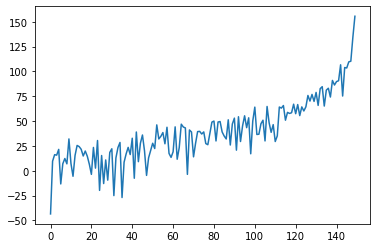

In [80]:
ls_spect = np.diagonal(magnitude_spectrum)
plt.plot(ls_spect[0:150])